In [3]:
import os

import chainer
from chainer import configuration
from chainer.dataset import convert
import chainer.links as L
import chainer.functions as F
from chainer import serializers

import math
import numpy as np
import cupy as cp
import random

import sklearn
from sklearn.utils import shuffle
import pickle

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import import_ipynb
import dnn_prog_model_run2
from dnn_prog_model_run2 import directory1, directory2, gpu_id, curriculum, batchsize
from dnn_prog_model_run2 import dnn1

import pandas as pd

importing Jupyter notebook from dnn_prog_model_run2.ipynb
importing Jupyter notebook from dnn_models.ipynb


## Check training progress
Load the losses and accuracies for both the training and testing results.

In [178]:
#directory1 = 'dnn_curr19_full' 
training_accu1 = pickle.load(open(os.path.join(directory1,"training_accu1.pkl"),"rb"))
testing_accu1 = pickle.load(open(os.path.join(directory1,"testing_accu1.pkl"),"rb"))
training_loss1 = pickle.load(open(os.path.join(directory1,"training_loss1.pkl"),"rb"))
testing_loss1 = pickle.load(open(os.path.join(directory1,"testing_loss1.pkl"),"rb"))
print('curriculum: {:02d}'.format(curriculum), '       batchsize: {:04d}'.format(batchsize))
print('recent epoch:', len(training_accu1))
 
print('baseline random model:{: .06f}'.format(1/(curriculum+3)))
print('MPL1 train_accu:{: .06f}'.format(float(training_accu1[len(training_accu1)-1])), '  MPL1 test_accu:{: .06f}'.format(float(testing_accu1[len(testing_accu1)-1])))

drop = float(training_accu1[len(training_accu1)-1]) - float(training_accu1[len(training_accu1)-2])
if drop<0:
    print('accuracy decrease by:{: .06f}'.format(drop))
elif drop>0:
    print('accuracy increase by:{: .06f}'.format(drop))
elif drop == 0:
    print('no change')
print()    
#print('MPL1 train_loss:{: .06f}'.format(float(training_loss1[len(training_loss1)-1])), '  MPL1 test_loss:{: .06f}'.format(float(testing_loss1[len(testing_loss1)-1])))    


curriculum: 32        batchsize: 4608
recent epoch: 31600
baseline random model: 0.028571
MPL1 train_accu: 0.756611   MPL1 test_accu: 0.793043
accuracy increase by: 0.001773



In [183]:
min_y = 0.50 #0.7099 #0.75499 
max_y = 1.01 #0.7800 #0.76299 

min_x = -100
max_x = 316000 #len(training_accu1)+100

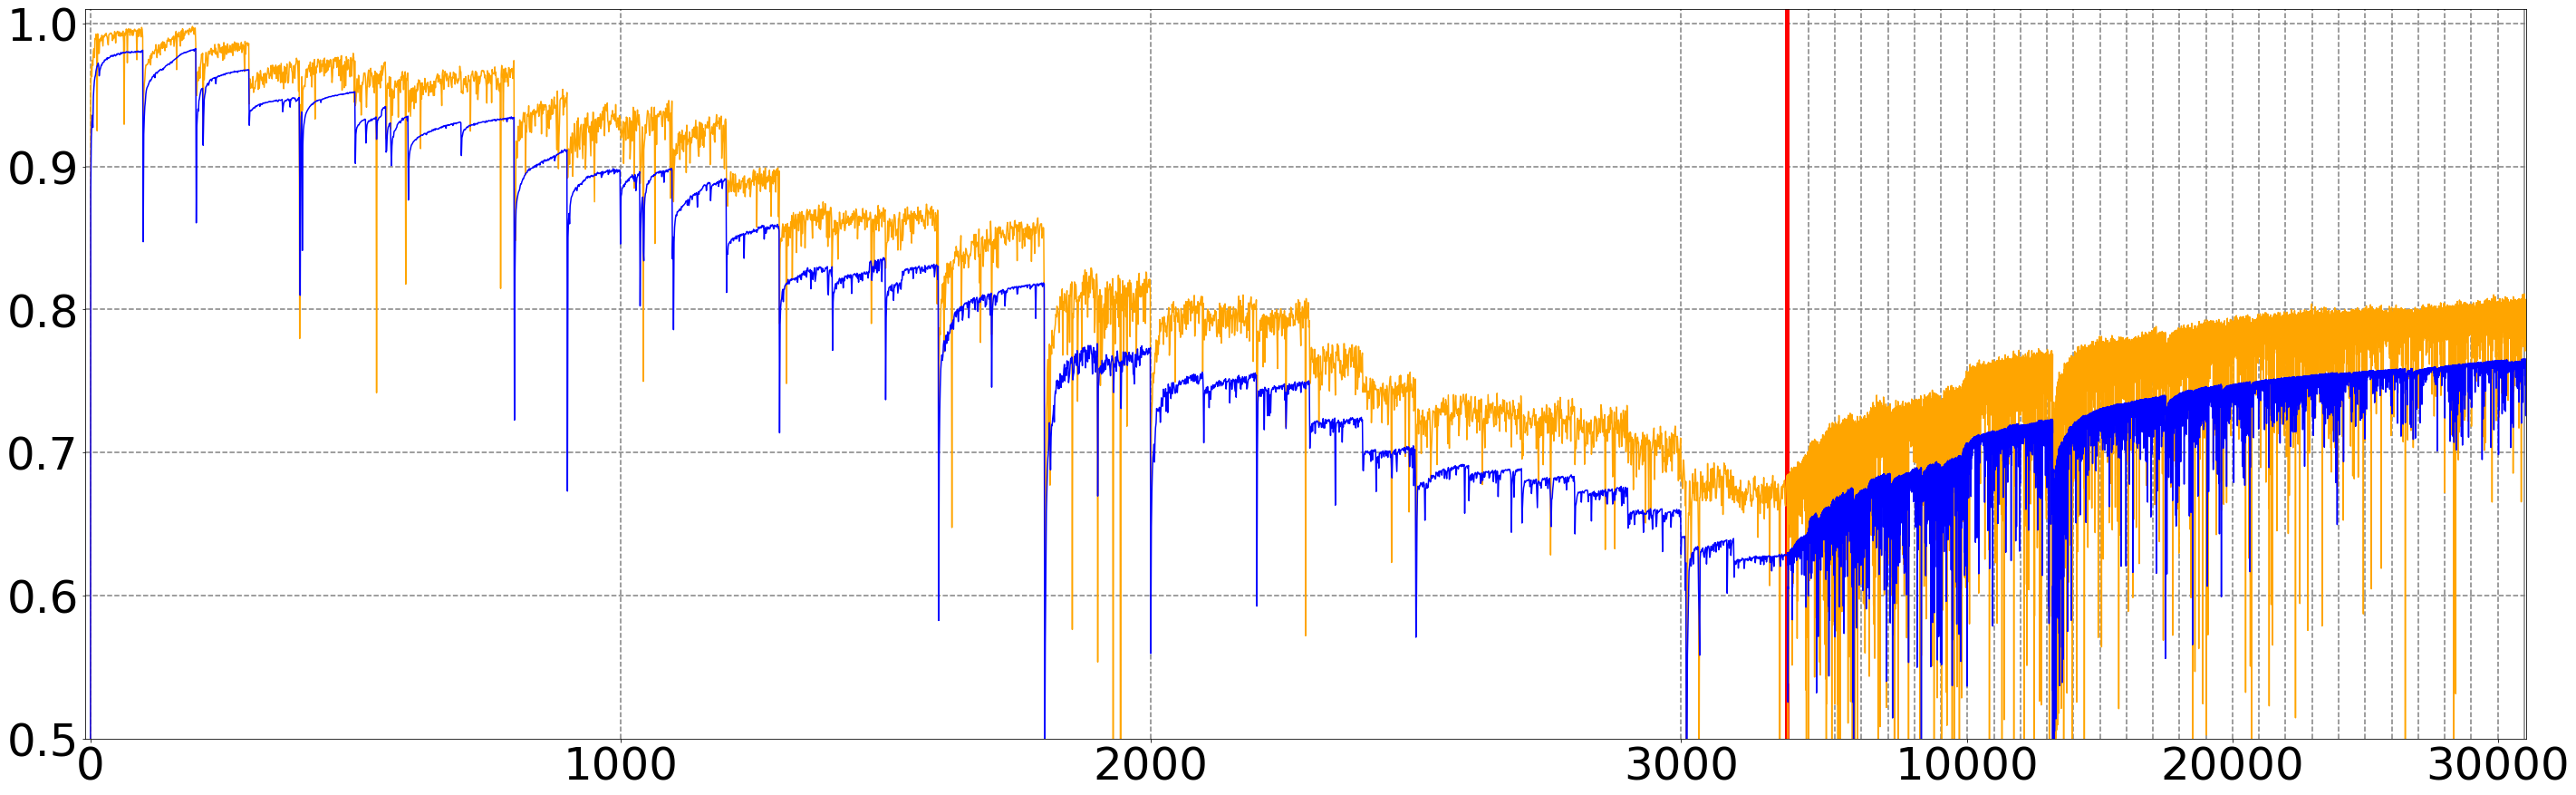

In [177]:
# %matplotlib qt
#%matplotlib inline

def my_xscale(xinput):
    if xinput<3201:
        myscale = xinput
    if xinput>3201:
        myscale = xinput/10
    return myscale

font_set_size = 50
font_set_size2 = 50
plt.subplots(1,1,figsize=(40,20)) #empty figure with nothing

#first ow
plt.subplot(331).set_ylim(min_y,max_y)
plt.subplot(331).set_xlim(-10,3201+(31050-3201)/20)

plt.axhline(0.60,-100,6001,c='gray',linestyle='--')
plt.axhline(0.70,-100,6001,c='gray',linestyle='--')
plt.axhline(0.80,-100,6001,c='gray',linestyle='--')
plt.axhline(0.90,-100,6001,c='gray',linestyle='--')
plt.axhline(1.00,-100,6001,c='gray',linestyle='--')

plt.axvline(x=0,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=1000,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=2000,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3000,ymin=0.0,ymax=1.5,c='gray',linestyle='--')

plt.axvline(x=3200,ymin=0.0,ymax=1.5,c='red',linestyle='-',linewidth=5)

plt.axvline(x=3200+(4000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(5000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(6000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(7000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(8000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(9000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(10000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')


plt.axvline(x=3200+(11000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(12000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(13000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(14000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(15000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(16000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(17000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(18000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(19000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(20000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')

plt.axvline(x=3200+(21000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(22000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(23000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(24000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(25000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(26000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(27000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(28000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(29000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')
plt.axvline(x=3200+(30000-3201)/20,ymin=0.0,ymax=1.5,c='gray',linestyle='--')

plt.axvline(x=3200+(31000-3201)/20,ymin=0.0,ymax=1.5,c='gray')
plt.axvline(x=3200+(32000-3201)/20,ymin=0.0,ymax=1.5,c='gray')

test2 = plt.plot([0]+testing_accu1[1:3200],'orange')+plt.plot(3201+np.arange(3201-3201,31050-3201,1)/20,testing_accu1[3201:31050],'orange')
train2 = plt.plot([0]+training_accu1[1:3200],'blue')+plt.plot(3201+np.arange(3201-3201,31050-3201,1)/20,training_accu1[3201:31050],'blue')

xpositions = [0, 1000, 2000, 3000, 3200+(10000-3201)/20, 3200+(20000-3201)/20, 3200+(30000-3201)/20] 
xlabels = ['0', '1000', '2000', '3000', '10000', '20000', '30000']  


#plt.title('DNN model 2: 3x37-'+dnn1.desc+'-35',fontsize=font_set_size)
plt.yticks(fontsize=font_set_size)
plt.xticks(xpositions,xlabels,fontsize=font_set_size2)
#plt.gca().set_xscale('linear')
#plt.grid(True)


plt.subplots_adjust(top=2.00, bottom=0.1, left=0.10, right=3.00, 
                    hspace=0.2, wspace=0.05) #spaces in between 'aka:cross'

plt.show()